Copyright (c) Fraunhofer MEVIS, Germany. All rights reserved.

Downloads image patches from a webserver 

Adapt `project`, `image`, `level`, and `userCredentials` as needed.

The `project` and `image` can be extracted from the browser's URL when viewing registered images at histo.app.

In [62]:
#!/usr/bin/env python3

import numpy as np
import requests
from PIL import Image
import io, json
from tqdm.notebook import trange, tqdm

# adapt as needed
baseurl="https://histoapp.mevis.fraunhofer.de"
patch_size = 256
project="project" # adapt as needed
image="frontend__29_29-Ki67__3_nonparametric.sqreg" # adapt as needed
level=4
userCredentials=('user','password') # adapt as needed


import PIL.Image

def setupBigTiff(project, imageName, level):
  metadata = requests.get('{}/api/v1//projects/{}/images/{}'.format(baseurl, project, imageName), auth = userCredentials).json()
  serverLevel = len(metadata["voxelsizes"])-level-1
  extent = metadata["ml_extent"][level]
  print("Downloading {} at resolution {}x{}...".format(imageName,extent[0],extent[1]))
  return serverLevel, extent

def getPatch(project, image, level, z, startPx, endPx):
  result = requests.get('{}/api/v1/projects/{}/images/{}/region/{}/{}/start/{}/{}/end/{}/{}'.format(baseurl, project, image, level, z, startPx[0], startPx[1], endPx[0]-1, endPx[1]-1), auth = userCredentials)
  image = Image.open(io.BytesIO(result.content))
  imgNP =  np.array(image)
  return imgNP

serverLevel, extent = setupBigTiff(project, image, level)
yrange = iter(range(2000, extent[1], patch_size)) # starting at (2000,2000) to prevent "empty" patches, this must be changed when iterating over the complete image
xrange = iter(range(2000, extent[0], patch_size))


### Get the patches

Run the following cell mutliple times, each execution will produce a new pair of patches

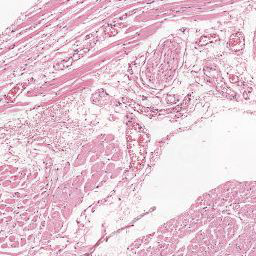

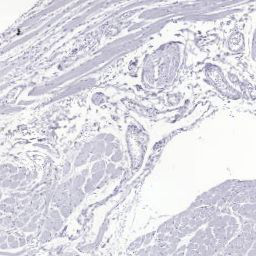

In [64]:
x=next(xrange)
y=next(yrange)
startPx=(x,y)
endPx=(extent[0] if x+patch_size > extent[0] else x+patch_size, extent[1] if y+patch_size > extent[1] else y+patch_size)
if endPx[0] > extent[0]: endPx[0]
imagePatchR = getPatch(project, image, serverLevel, 0, startPx, endPx)
imagePatchT = getPatch(project, image, serverLevel, 1, startPx, endPx)

display(PIL.Image.fromarray(imagePatchR))
display(PIL.Image.fromarray(imagePatchT))